In [84]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


In [85]:
df = pd.read_csv('heart.csv')

In [86]:
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score,ConfusionMatrixDisplay,RocCurveDisplay

In [87]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [88]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

<Axes: xlabel='target', ylabel='count'>

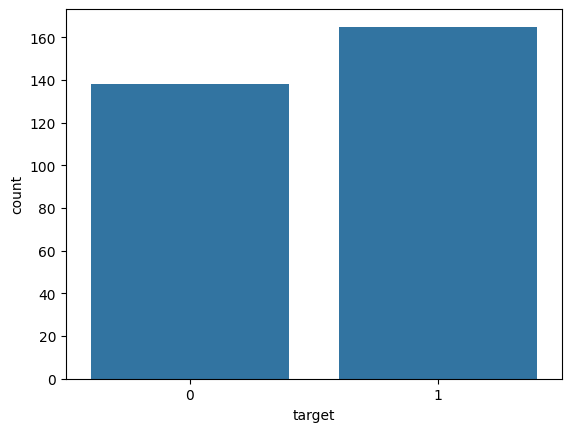

In [89]:
sns.barplot(df['target'].value_counts())

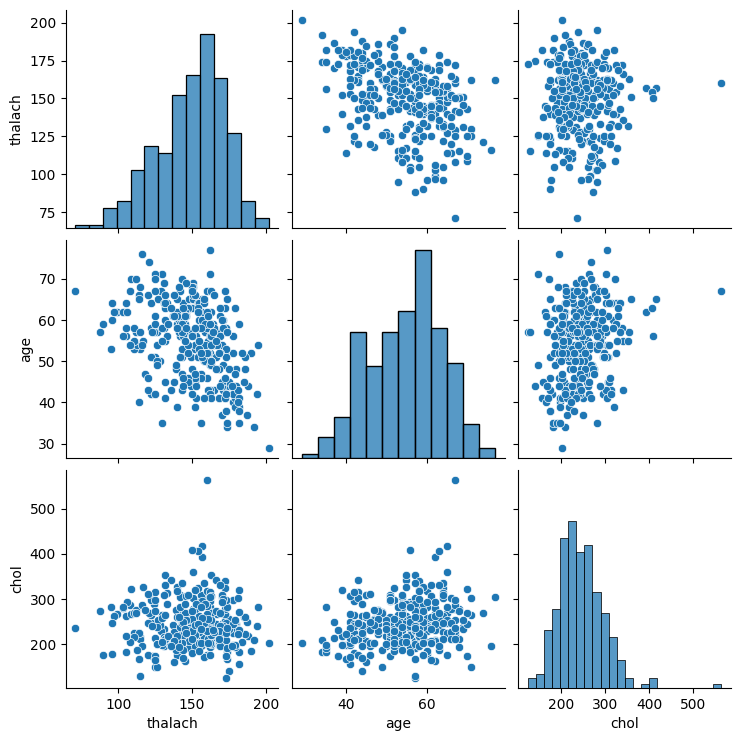

In [90]:
sns.pairplot(df[['thalach','age','chol']])

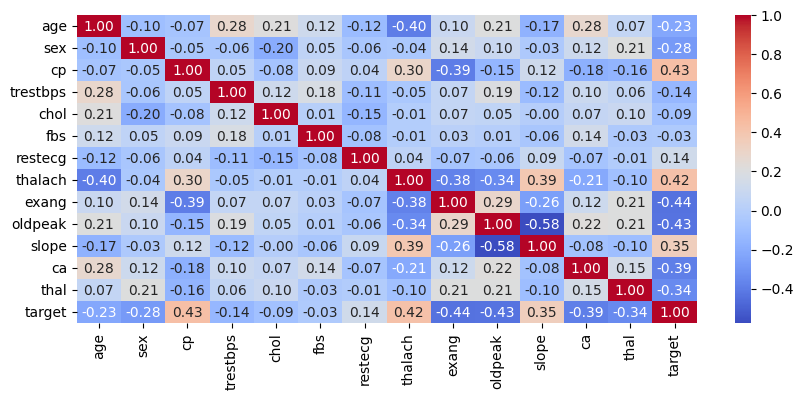

In [91]:
plt.figure(figsize=(10,4))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.show()

In [92]:
X = df.drop('target',axis=1)
y = df['target']

In [93]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=101)

In [94]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)


In [95]:
model = LogisticRegression()

In [102]:
param_grid={'penalty':['l1','l2'],'C':np.logspace(0,4,10)}

In [111]:
grid_cv_model = GridSearchCV(estimator=model,param_grid=param_grid,cv=10)

In [112]:
grid_cv_model.fit(x_train,y_train)

c:\Users\AKHIL AHMED\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
100 fits failed out of a total of 200.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
100 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\AKHIL AHMED\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\AKHIL AHMED\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "

GridSearchCV(cv=10, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e+00, 2.78255940e+00, 7.74263683e+00, 2.15443469e+01,
       5.99484250e+01, 1.66810054e+02, 4.64158883e+02, 1.29154967e+03,
       3.59381366e+03, 1.00000000e+04]),
                         'penalty': ['l1', 'l2']})

In [113]:
grid_cv_model.best_params_

{'C': 2.7825594022071245, 'penalty': 'l2'}

C:\Users\AKHIL AHMED\AppData\Local\Temp\ipykernel_66920\1130838868.py:20: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  axs[0].add_patch(mpatches.Rectangle((x - box_width / 2, y - 0.05), box_width, 0.1, fill=True, color='lightblue', edgecolor='black', linewidth=2))


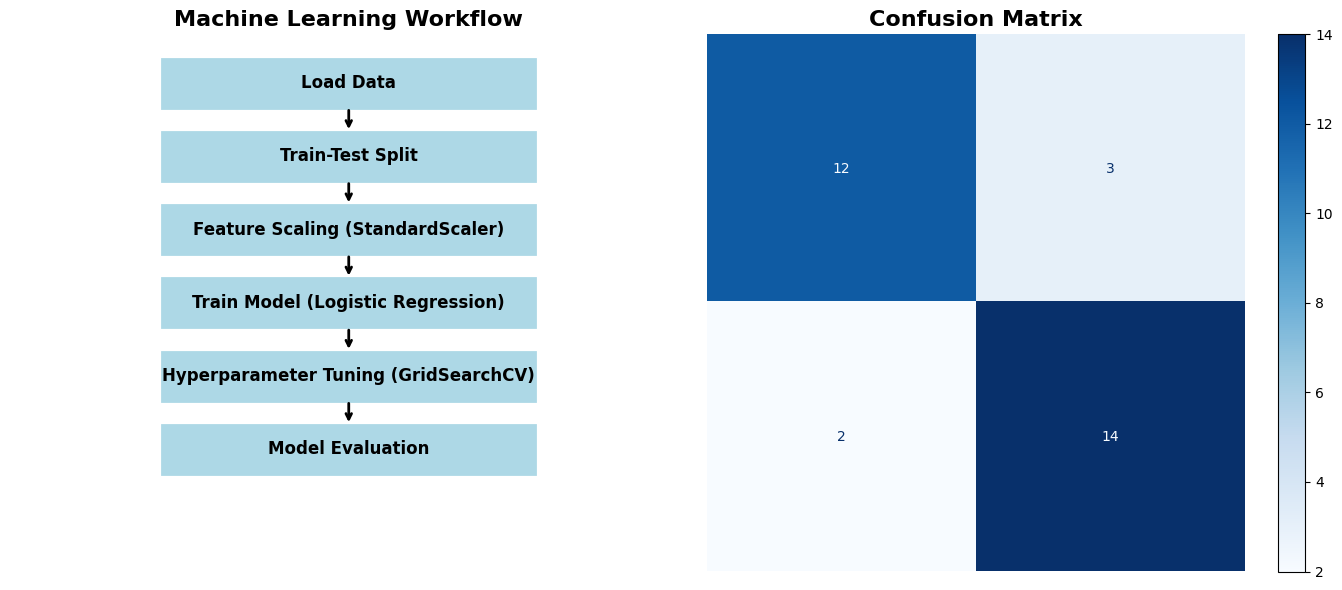

In [114]:
fig, axs = plt.subplots(1, 2, figsize=(14, 6))

# --- Flowchart Section (Left Plot) ---
flowchart_steps = {
    "Load Data": (0.5, 0.9),
    "Train-Test Split": (0.5, 0.75),
    "Feature Scaling (StandardScaler)": (0.5, 0.6),
    "Train Model (Logistic Regression)": (0.5, 0.45),
    "Hyperparameter Tuning (GridSearchCV)": (0.5, 0.3),
    "Model Evaluation": (0.5, 0.15)
}

# Flowchart styling
box_width = 0.55
arrowprops = dict(arrowstyle="->", color="black", lw=2)
flowchart_fontsize = 12

# Draw flowchart steps as boxes
for step, (x, y) in flowchart_steps.items():
    axs[0].add_patch(mpatches.Rectangle((x - box_width / 2, y - 0.05), box_width, 0.1, fill=True, color='lightblue', edgecolor='black', linewidth=2))
    axs[0].text(x, y, step, ha='center', va='center', fontsize=flowchart_fontsize, fontweight='bold')

# Draw arrows between flowchart steps
for i, (step1, (x1, y1)) in enumerate(flowchart_steps.items()):
    if i < len(flowchart_steps) - 1:
        step2 = list(flowchart_steps.keys())[i + 1]
        x2, y2 = flowchart_steps[step2]
        axs[0].annotate('', xy=(x2, y2 + 0.05), xytext=(x1, y1 - 0.05), arrowprops=arrowprops)

# Set limits, remove axis, and add title for flowchart
axs[0].set_xlim(0, 1)
axs[0].set_ylim(-0.1, 1)
axs[0].axis('off')
axs[0].set_title('Machine Learning Workflow', fontsize=16, fontweight='bold')

# --- Confusion Matrix Plot (Right Plot) ---
# Plot the confusion matrix on the right subplot
disp.plot(ax=axs[1], cmap='Blues', values_format='d')

# Title and layout adjustments
axs[1].set_title('Confusion Matrix', fontsize=16, fontweight='bold')

# Remove axis for the confusion matrix plot
axs[1].axis('off')

# Adjust layout for better spacing between flowchart and confusion matrix
plt.tight_layout()

# Show the final plot
plt.show()